In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
df = pd.read_csv("crime_data_1_Priya.csv")
df

,Unnamed: 0,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,9,211904005.0,12/31/2020 0:00,12/31/2020 0:00,1220.0,19.0,Mission,1974.0,2.0,624.0,...,IC,Invest Cont,624.0,NaN,NaN,NaN,9000 CEDROS AV,NaN,34.2336,-118.4535
1,11,221908151.0,4/12/2022 0:00,10/1/2020 0:00,1.0,19.0,Mission,1988.0,1.0,821.0,...,IC,Invest Cont,812.0,821.0,NaN,NaN,13400 RANGOON ST,NaN,34.2285,-118.4258
2,12,230204214.0,1/5/2023 0:00,2/1/2020 0:00,800.0,2.0,Rampart,201.0,2.0,812.0,...,IC,Invest Cont,812.0,860.0,NaN,NaN,900 N MARIPOSA AV,NaN,34.0868,-118.2991
3,17,210705560.0,11/27/2020 0:00,11/27/2020 0:00,1800.0,7.0,Wilshire,776.0,1.0,230.0,...,AA,Adult Arrest,230.0,NaN,NaN,NaN,4500 LOMITA ST,NaN,34.0452,-118.3351
4,21,231907172.0,3/21/2023 0:00,3/15/2020 0:00,1200.0,19.0,Mission,1983.0,2.0,812.0,...,AO,Adult Other,812.0,860.0,NaN,NaN,8500 COLUMBUS AV,NaN,34.2246,-118.4654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
325773,974432,240405919.0,2/27/2024 0:00,2/26/2024 0:00,1545.0,4.0,Hollenbeck,422.0,1.0,761.0,...,IC,Invest Cont,761.0,NaN,NaN,NaN,THOMAS ST,BALDWIN ST,34.0703,-118.2052
325774,974437,241604405.0,1/14/2024 0:00,1/13/2024 0:00,720.0,16.0,Foothill,1673.0,1.0,230.0,...,IC,Invest Cont,230.0,NaN,NaN,NaN,8700 LANKERSHIM BL,NaN,34.2271,-118.3878
325775,974439,242004546.0,1/16/2024 0:00,1/16/2024 0:00,1510.0,20.0,Olympic,2013.0,2.0,624.0,...,IC,Invest Cont,624.0,NaN,NaN,NaN,HOBART BL,3RD ST,34.0690,-118.3054
325776,974442,240104953.0,1/15/2024 0:00,1/15/2024 0:00,100.0,1.0,Central,101.0,2.0,745.0,...,IC,Invest Cont,745.0,NaN,NaN,NaN,1300 W SUNSET BL,NaN,34.0685,-118.2460


In [9]:
# Convert DATE OCC to dateformat
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], errors='coerce')

In [10]:
# Drop any rows with null
df = df.dropna(subset=['DATE OCC'])

In [11]:
# Aggregate the data by date
crime_by_date = df.groupby('DATE OCC').size()

In [12]:
# Frequency and fill missing dates with 0
crime_by_date = crime_by_date.resample('D').sum().fillna(0)

In [13]:
# Display the first few entries to verify
crime_by_date.head()

DATE OCC
2020-01-01    508
2020-01-02    184
2020-01-03    196
2020-01-04    222
2020-01-05    187
Freq: D, dtype: int64

In [14]:
# Fitting an ARIMA model 
model = ARIMA(crime_by_date, order=(1, 1, 1)) 
fitted_model = model.fit()

In [18]:
# Forecast future crime rates
forecast_steps = 500  
forecast = fitted_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(crime_by_date.index[-1] + pd.Timedelta(days=1), periods=forecast_steps)
forecast_values = forecast.predicted_mean

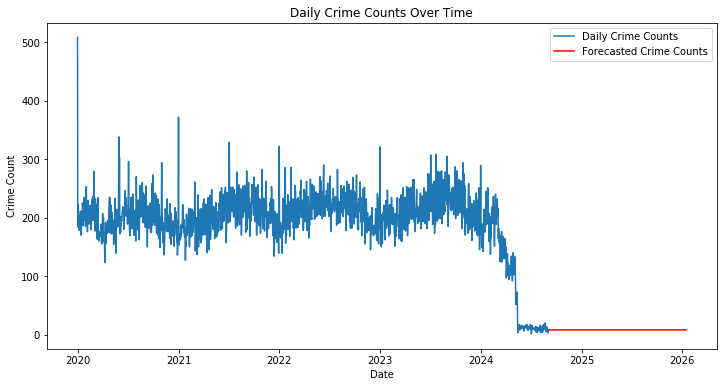

In [19]:
# Plot the crime counts to visualize
plt.figure(figsize=(12, 6))
plt.plot(crime_by_date, label='Daily Crime Counts')
plt.plot(forecast_index, forecast_values, color='red', label='Forecasted Crime Counts')
plt.title('Daily Crime Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

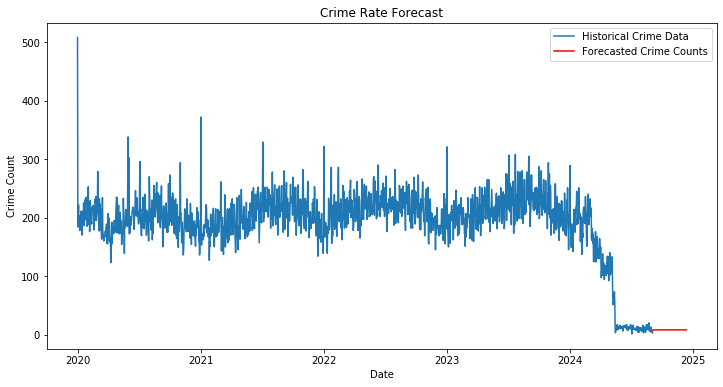

In [17]:
# Plot forecasted values
plt.figure(figsize=(12, 6))
plt.plot(crime_by_date, label='Historical Crime Data')
plt.plot(forecast_index, forecast_values, color='red', label='Forecasted Crime Counts')
plt.title('Crime Rate Forecast')
plt.xlabel('Date')
plt.ylabel('Crime Count')
plt.legend()
plt.show()

In [4]:
print(df.columns)

Index(['Unnamed: 0', 'DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA',
       'AREA NAME', 'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc',
       'Vict Age', 'VictXSex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Step 1: Load and preprocess your crime data (assuming 'Crime Rate' is the time series data)
df['DATE_OCC'] = pd.to_datetime(df['DATE OCC'])
df.set_index('DATE_OCC', inplace=True)

# Resample the data to a desired frequency (e.g., daily or monthly crime counts)
crime_rate = df['Crime Rate'].resample('D').sum()  # Sum crimes per day

# Step 2: Check for stationarity (use differencing if needed)
# Plot ACF and PACF to determine the lags for AR and MA components
plot_acf(crime_rate)
plot_pacf(crime_rate)
plt.show()

# Step 3: Fit ARIMA model (p, d, q are chosen based on ACF, PACF, and stationarity)
model = ARIMA(crime_rate, order=(1, 1, 1))  # Adjust p, d, q based on analysis
model_fit = model.fit()

# Step 4: Model Summary
print(model_fit.summary())

# Step 5: Forecast future crime rates
forecast = model_fit.forecast(steps=30)  # Forecast next 30 days
forecast_dates = pd.date_range(crime_rate.index[-1], periods=31, freq='D')[1:]

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(crime_rate, label='Historical Crime Rate')
plt.plot(forecast_dates, forecast, label='Forecasted Crime Rate', color='red')
plt.legend()
plt.show()

# Step 6: Evaluate the model's residuals
residuals = model_fit.resid
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.show()

KeyError: 'Crime Rate'